In [5]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
msg=pd.read_csv(r"D:\Deskptop folders\Data set\spam.csv")

In [9]:
msg.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
msg

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [50]:
msg = msg.loc[:, ~msg.columns.str.contains('^Unnamed')]
#removes the unnescessary unanmed columns from the dataset

In [15]:
msg.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
msg.columns=['label','message']
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
msg.shape

(5572, 2)

In [22]:
msg['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [24]:
msg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    647  Please call our customer service representativ...    4

In [26]:
msg['length']=msg['message'].apply(len)

C:\Users\shrey\AppData\Local\Temp\ipykernel_5788\2873680644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['length']=msg['message'].apply(len)


In [28]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


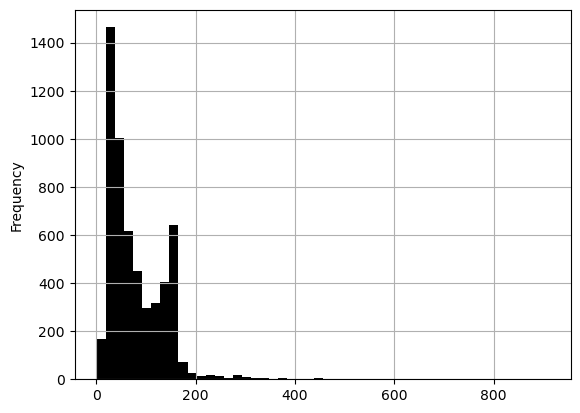

In [40]:
msg['length'].plot(bins=50,kind='hist',color='black')
plt.grid()

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
import string
from nltk.corpus import stopwords

In [48]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [82]:
def text_process(message):
    nopunc=[char for char in message if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join(word for word in nopunc.split() if word.lower() not in stopwords.words('english'))
# this function will return the message which will not contain both any punctuation as well as any stopwords

In [58]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Tokenization- the process of converting a string into tokens (words that we actually want)

In [84]:
msg['tokenized_message']=msg['message'].apply(text_process)

In [86]:
msg.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


### Vectorization

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
vectorizer=CountVectorizer(stop_words='english')
X=vectorizer.fit_transform(msg['tokenized_message'])

In [94]:
msg.iloc[5200]['tokenized_message']

'Call Germany 1 pence per minute Call fixed line via access number 0844 861 85 85 prepayment Direct access wwwtelediscountcouk'

In [103]:
X.toarray()[5200]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
print(vectorizer.get_feature_names_out())

['008704050406' '0089my' '0121' ... 'zoom' 'zouk' 'zyada']


In [107]:
len(vectorizer.get_feature_names_out())

9165

In [111]:
msg['tokenized_message'].shape

(5572,)

In [113]:
X.toarray().shape

(5572, 9165)

### Training the model

In [121]:
from sklearn.model_selection import train_test_split
train_vectorized,test_vectorized,label_train,label_test=train_test_split(X,msg['label'],test_size=0.2)

In [123]:
train_array=train_vectorized.toarray()
test_array=test_vectorized.toarray()

In [125]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model=GaussianNB()
spam_detect_model.fit(train_array,label_train)

GaussianNB()

In [127]:
train_preds=spam_detect_model.predict(train_array)
test_preds=spam_detect_model.predict(test_array)

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3631  234]
 [   0  592]]
[[858 102]
 [ 11 144]]


In [138]:
print(classification_report(label_train,train_preds))
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      3865
        spam       0.72      1.00      0.83       592

    accuracy                           0.95      4457
   macro avg       0.86      0.97      0.90      4457
weighted avg       0.96      0.95      0.95      4457

              precision    recall  f1-score   support

         ham       0.99      0.89      0.94       960
        spam       0.59      0.93      0.72       155

    accuracy                           0.90      1115
   macro avg       0.79      0.91      0.83      1115
weighted avg       0.93      0.90      0.91      1115



In [142]:
import pickle
#saving the vectorizer
with open('vectorizer_filename.pkl','wb') as f:
    pickle.dump(vectorizer,f)

#saving the model
with open ('spam_detect_model.pkl','wb') as f:
    pickle.dump(spam_detect_model,f)